In [1]:
import pandas as pd

In [4]:
crop = pd.read_csv("../dataset/raw/crop.csv")
fert = pd.read_csv("../dataset/raw/fertilizer.csv")

In [5]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5


In [7]:
# Function for lowering the cases
def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i

In [8]:
fert['Crop'] = fert['Crop'].apply(change_case)
crop['label'] = crop['label'].apply(change_case)

In [9]:
#make some changes in ferttilizer dataset

fert['Crop'] = fert['Crop'].replace('mungbeans','mungbean')
fert['Crop'] = fert['Crop'].replace('lentils(masoordal)','lentil')
fert['Crop'] = fert['Crop'].replace('pigeonpeas(toordal)','pigeonpeas')
fert['Crop'] = fert['Crop'].replace('mothbean(matki)','mothbeans')
fert['Crop'] = fert['Crop'].replace('chickpeas(channa)','chickpea')

In [10]:
crop_names = crop['label'].unique()
crop_names

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [11]:
del fert['Unnamed: 0']

In [12]:
crop_names_from_fert = fert['Crop'].unique()
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpea', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'greenpeas', 'horsegram(kulthi)',
       'blackgram', 'rapeseed(mohri)', 'corianderseeds', 'mustardseeds',
       'sesameseed', 'cuminseeds', 'lentil', 'brinjal', 'beetroot',
       'bittergourd', 'bottlegourd', 'capsicum', 'cabbage', 'carrot',
       'cauliflower', 'cucumber', 'corianderleaves', 'curryleaves',
       'drumstick–moringa', 'chili', 'ladyfinger', 'mushroom', 'onion',
       'potato', 'pumpkin', 'radish', 'olive', 'sweetpotato',
       'fenugreekleaf(methi)', 'spinach', 'ridgegourd',
       'gooseberry(amla)', 'jambun(syzygiumcumini)',
       'ziziphusmauritiana(bor)', 'garciniaindica(kokam)', 'tamarind',
       'tapioca(suran)', 'garlic', 'lemon', 'tomato', 'ashgourd',
       '

In [13]:
for i in crop_names_from_fert:
    print(crop[crop['label'] == i])

    temperature   humidity        ph    rainfall label
0     20.879744  82.002744  6.502985  202.935536  rice
1     21.770462  80.319644  7.038096  226.655537  rice
2     23.004459  82.320763  7.840207  263.964248  rice
3     26.491096  80.158363  6.980401  242.864034  rice
4     20.130175  81.604873  7.628473  262.717340  rice
..          ...        ...       ...         ...   ...
95    22.683191  83.463583  6.604993  194.265172  rice
96    21.533463  82.140041  6.500343  295.924880  rice
97    21.408658  83.329319  5.935745  287.576693  rice
98    26.543481  84.673536  7.072656  183.622266  rice
99    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 5 columns]
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
     temperature   humidity        ph    rainfall  label
500    22.613600  63.690706  5.749914   87.759539  maize
501    26.100184  71.574769  6.931757  102

In [14]:
crop['label']

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

In [15]:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)


In [16]:
# using extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop.columns)
new_fert = pd.DataFrame(columns = fert.columns)

In [19]:
for label in extract_labels:
    filtered_crop = crop[crop['label'] == label]
    if not filtered_crop.empty:
        new_crop = pd.concat([new_crop, filtered_crop], ignore_index=True)

In [21]:
for label in extract_labels:
    filtered_fert = fert[fert['Crop'] == label]
    if not filtered_fert.empty:
        filtered_fert = filtered_fert[filtered_fert.columns.intersection(new_fert.columns)]
        new_fert = pd.concat([new_fert, filtered_fert.iloc[[0]]], ignore_index=True)

In [22]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
4395,26.774637,66.413269,6.780064,177.774507,coffee
4396,27.417112,56.636362,6.086922,127.924610,coffee
4397,24.131797,67.225123,6.362608,173.322839,coffee
4398,26.272418,52.127394,6.758793,127.175293,coffee


In [25]:
duplicate = new_crop[new_crop.duplicated()]
duplicate

,temperature,humidity,ph,rainfall,label
2200,20.879744,82.002744,6.502985,202.935536,rice
2201,21.770462,80.319644,7.038096,226.655537,rice
2202,23.004459,82.320763,7.840207,263.964248,rice
2203,26.491096,80.158363,6.980401,242.864034,rice
2204,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
4395,26.774637,66.413269,6.780064,177.774507,coffee
4396,27.417112,56.636362,6.086922,127.924610,coffee
4397,24.131797,67.225123,6.362608,173.322839,coffee
4398,26.272418,52.127394,6.758793,127.175293,coffee


In [26]:
new_crop = new_crop.drop_duplicates()

In [27]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


In [23]:
new_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,chickpea,40,60,80,5.5
3,kidneybeans,20,60,20,5.5
4,pigeonpeas,20,60,20,5.5
5,mothbeans,20,40,20,5.5
6,mungbean,20,40,20,5.5
7,blackgram,40,60,20,5.0
8,lentil,20,60,20,5.5
9,pomegranate,20,10,40,5.5


In [28]:
new_fert.describe()

,pH
count,44.000000
mean,5.409091
std,0.583421
min,4.000000
25%,5.500000
50%,5.500000
75%,5.500000
max,6.500000


In [29]:
new_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [30]:
# new_crop.to_csv('../Data-raw/MergeFileCrop.csv')
# new_fert.to_csv('../Data-raw/FertilizerData.csv')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

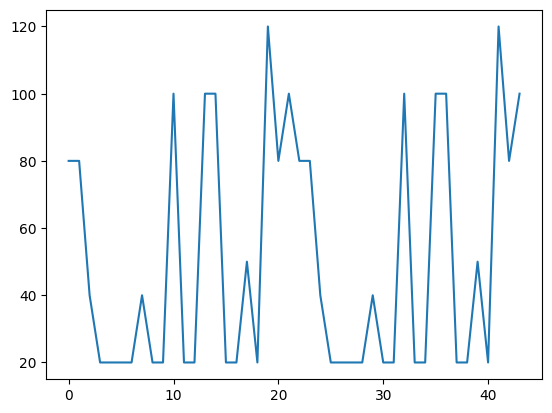

In [32]:
plt.plot(new_fert["N"])

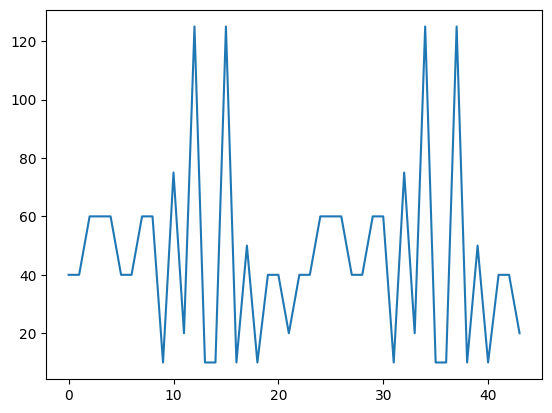

In [33]:
plt.plot(new_fert["P"])

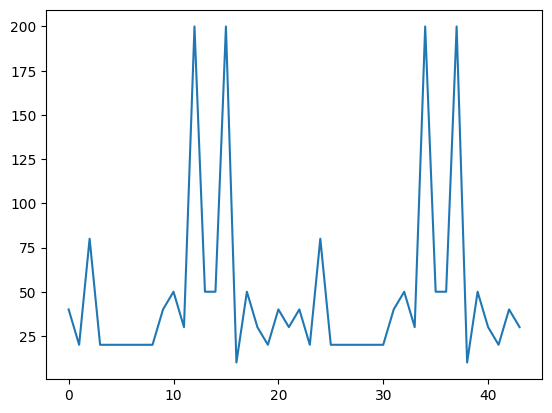

In [34]:
plt.plot(new_fert["K"])

In [36]:
# sns.heatmap(new_fert.corr(),annot=True)

In [40]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(new_crop.shape[0]):
    crop = new_crop.label.iloc[i]
    N = new_fert[new_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = new_fert[new_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = new_fert[new_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    d = pd.DataFrame({"N": [N], "P": [P], "K": [K]})
    
    # Concatenate the new row with the existing DataFrame
    temp = pd.concat([temp, d], ignore_index=True)

In [41]:
temp

,N,P,K
0,75,60,42
1,66,38,40
2,86,46,37
3,71,54,35
4,81,57,40
...,...,...,...
2195,106,40,28
2196,95,20,35
2197,109,18,30
2198,111,22,30


In [43]:
if len(new_crop) == len(temp):
    new_crop.loc[:, 'N'] = temp['N'].values
    new_crop.loc[:, 'P'] = temp['P'].values
    new_crop.loc[:, 'K'] = temp['K'].values
else:
    raise ValueError("The length of 'new_crop' does not match the length of 'temp'.")


In [44]:
new_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,75,60,42
1,21.770462,80.319644,7.038096,226.655537,rice,66,38,40
2,23.004459,82.320763,7.840207,263.964248,rice,86,46,37
3,26.491096,80.158363,6.980401,242.864034,rice,71,54,35
4,20.130175,81.604873,7.628473,262.717340,rice,81,57,40
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,106,40,28
2196,27.417112,56.636362,6.086922,127.924610,coffee,95,20,35
2197,24.131797,67.225123,6.362608,173.322839,coffee,109,18,30
2198,26.272418,52.127394,6.758793,127.175293,coffee,111,22,30


In [45]:
new_crop = new_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [49]:
new_crop.to_csv("../dataset/processed/crop_recommendation.csv",index=False)

In [50]:
df = pd.read_csv('../dataset/processed/crop_recommendation.csv')

In [51]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,75,60,42,20.879744,82.002744,6.502985,202.935536,rice
1,66,38,40,21.770462,80.319644,7.038096,226.655537,rice
2,86,46,37,23.004459,82.320763,7.840207,263.964248,rice
3,71,54,35,26.491096,80.158363,6.980401,242.864034,rice
4,81,57,40,20.130175,81.604873,7.628473,262.717340,rice
